# Ajustes previos

In [23]:
# load datasets (students Portuguese scores)

import pandas as pd

d = pd.read_csv('Data/df_regresion.csv')
d.head(4)

,Identificador de persona,Identificador de hogar,Area,Sexo,Edad,Seguro Social - Alternativa 1,Seguro Social - Alternativa 2,Estado civil,Nivel de instrucción,Nivel de instrucción.1,...,Parientes,No parientes,Empleado(a) doméstico(a),Tipology,PARROQUIA_CODIGO,Número de mujeres en el hogar,Número de personas del hogar,Elección política,Votos proporcionales,random
0,10015290090200507101,100152900902005071,Rural,Mujer,74.0,"IESS, seguro general",Ninguno,Separado(a),Primaria,Educación Básica,...,0,0,0,Hogar tipo 1,100152,1,1,1030,3,5
1,10015290090200507101,100152900902005071,Rural,Mujer,74.0,"IESS, seguro general",Ninguno,Separado(a),Primaria,Educación Básica,...,0,0,0,Hogar tipo 1,100152,1,1,18,1,6
2,10015290090200507101,100152900902005071,Rural,Mujer,74.0,"IESS, seguro general",Ninguno,Separado(a),Primaria,Educación Básica,...,0,0,0,Hogar tipo 1,100152,1,1,2,2,12
3,10015290090200507101,100152900902005071,Rural,Mujer,74.0,"IESS, seguro general",Ninguno,Separado(a),Primaria,Educación Básica,...,0,0,0,Hogar tipo 1,100152,1,1,Ausentes,3,9


In [24]:
# Vamos a identificar las columnas para adecuador su tipo (str, float o int)

d.columns

Index(['Identificador de persona', 'Identificador de hogar', 'Area', 'Sexo',
       'Edad', 'Seguro Social - Alternativa 1',
       'Seguro Social - Alternativa 2', 'Estado civil', 'Nivel de instrucción',
       'Nivel de instrucción.1', 'Cómo se considera',
       'Condición de inactividad', 'Categoría de ocupación',
       'Cuántos años trabaja', 'Condición de actividad', 'Ingreso Laboral',
       'Grupo de Ocupación CIUO8 (población ocupada de 15 años y más)',
       'Rama de Actividad CIIU4 (población ocupada de 15 años y más)',
       'Ingreso per cápita', 'Pobreza', 'Extrema Pobreza',
       'Forma de tenencia de la vivienda',
       'Con relación al mes anterior, la situación económica de su hogar es:',
       'Cómo cree usted que será la situación económica de su hogar dentro de los próximos 3 meses:',
       'Planea usted o algún miembro del hogar adquirir un vehículo en los próximos 3 meses',
       'Planea usted o algún miembro del hogar adquirir un inmueble (casa, departame

In [25]:
# Depuramos variables que ya no son útiles para este análisis de árbol de decisión

d = d.drop(columns=['Nivel de instrucción.1', 
                    'Identificador de persona', 
                    'Identificador de hogar', 
                    'Ingreso Laboral',
                    'random', 
                    'Grupo de Ocupación CIUO8 (población ocupada de 15 años y más)',
                    'PARROQUIA_CODIGO',
                    'Votos proporcionales'
                   ]
          )

In [26]:
# Creamos un diccionario para modificar el tipo de datos según deseemos

NEW = {'Area': str,
       'Sexo': str,
       'Edad': float,
       'Seguro Social - Alternativa 1': str,
       'Seguro Social - Alternativa 2': str,
       'Estado civil': str,
       'Nivel de instrucción': str,
       'Cómo se considera': str,
       'Condición de inactividad': str,
       'Categoría de ocupación': str,
       'Cuántos años trabaja': float,
       'Condición de actividad': str,
       'Rama de Actividad CIIU4 (población ocupada de 15 años y más)': str,
       'Pobreza': str,
       'Extrema Pobreza': str,
       'Forma de tenencia de la vivienda': str,
       'Con relación al mes anterior, la situación económica de su hogar es:': str,
       'Cómo cree usted que será la situación económica de su hogar dentro de los próximos 3 meses:': str,
       'Planea usted o algún miembro del hogar adquirir un vehículo en los próximos 3 meses': str,
       'Planea usted o algún miembro del hogar adquirir un inmueble (casa, departamento, pieza) en los próximos 3 meses': str,
       'Usted o algún miembro del hogar tiene planes de endeudamiento en los próximos 3 meses (bancos, financieras, etc.)': str,
       'Con relación al mes anterior, la situación económica del país es:': str,
       'Usted considera que durante los próximos 3 meses la situación económica del país será:': str,
       'En los 3 meses anteriores, considera que la situación en Ecuador para encontrar/mejorar un puesto de trabajo es:': str,
       'Considera usted que la situación en Ecuador para encontrar/mejorar un puesto de trabajo dentro de 3 meses será:': str,
       'Género del jefe/a de hogar': str,
       'Cónyuge': int,
       'Hijo o Hija': int,
       'Parientes': int,
       'No parientes': int,
       'Empleado(a) doméstico(a)': int,
       'Tipology': str,
       'Número de mujeres en el hogar': int,
       'Número de personas del hogar': int, 
       'Elección política': str,
       'Ingreso per cápita': float,
      }

d = d.astype(NEW)

Vamos a simplificar el modelo clasificando la elección política en 2: asignando 1 para los que votaron por UNES y 2 para los que no. 

In [27]:
# El código para la op 1030 indica si se voto por FUERZA COMPROMISO SOCIAL 

d['Elección política'] = d['Elección política'].apply(lambda election: 1 if election == '1030' else 0)

Vamos a ajustar la base, para evitar los NaNs, pues es imposible trabajar con ellos.

Detalle de ajustes:

Vamos a reemplazarlos valores perdidos como sigue:

1. Condensar las filas *Condición de inactividad* y *Condición de ocupación* en una sola fila llamada *Condición de ocupación*. Una vez hecho esto, los NaNs que aún sobren serán catalogados como *Otro motivo*.
2. Vamos a rellenar los NaNs de la variable categoría de ocupación con *No declara*.
3. Vamos a rellenar los NaNs o blancos de la variable cuántos años trabaja con 0.
4. Vamos a crear una solo variable para las variables *Pobreza* Y *Extrema pobreza* llamada *Tipo de pobreza*.
5. El *Grupo de Ocupación CIUO8 (población ocupada de 15 años y más)* y *Rama de Actividad CIIU4 (población ocupada de 15 años y más* serán depuradas con un reemplzados de NaNs por *Es inactivo*.
6. Los valores de *Ingreso per cápita* perdidos se van a excluir y vamos a hacer el ingreso entero, para evitar problemas con la librería sklearn.


In [28]:
# Hago que nan sea reconocido como ninguno

d = d.replace('nan', None)

# Reemplazo valores de la variable Condición de ocupación con Condición de inactividad

d['Condición de actividad'].fillna(d['Condición de inactividad'], inplace=True)
d['Condición de actividad'].fillna('Otro motivo', inplace=True)
# Elimino la variable que ya no será útil

del d['Condición de inactividad']

In [29]:
# El resto de modificaciones:

d = d.replace('nan', None)

d['Categoría de ocupación'].fillna('No declara', inplace=True)
d['Cuántos años trabaja'].fillna(0, inplace=True)

# Creamos una sola variable que se llame tipo de pobreza 

d['Pobreza'].fillna(d['Extrema Pobreza'], inplace=True)
d['Pobreza'].fillna('Ninguna', inplace=True) # Lleno los que aún no han sido clasficados

# Elimino la variable que ya no será útil

del d['Extrema Pobreza']

# y renombro la variable

d.rename(columns={'Pobreza': 'Tipo de pobreza'})

d['Rama de Actividad CIIU4 (población ocupada de 15 años y más)'].fillna('Es inactivo', inplace=True)


## Un ajuste inadvertido, pero costoso

Quiero que el lector sea consciente de que si no aproxima los decimales a 2 cifras, la librería no podrá hacer la simulación.

In [30]:
dict(d.dtypes)

{'Area': dtype('O'),
 'Sexo': dtype('O'),
 'Edad': dtype('float64'),
 'Seguro Social - Alternativa 1': dtype('O'),
 'Seguro Social - Alternativa 2': dtype('O'),
 'Estado civil': dtype('O'),
 'Nivel de instrucción': dtype('O'),
 'Cómo se considera': dtype('O'),
 'Categoría de ocupación': dtype('O'),
 'Cuántos años trabaja': dtype('float64'),
 'Condición de actividad': dtype('O'),
 'Rama de Actividad CIIU4 (población ocupada de 15 años y más)': dtype('O'),
 'Ingreso per cápita': dtype('float64'),
 'Pobreza': dtype('O'),
 'Forma de tenencia de la vivienda': dtype('O'),
 'Con relación al mes anterior, la situación económica de su hogar es:': dtype('O'),
 'Cómo cree usted que será la situación económica de su hogar dentro de los próximos 3 meses:': dtype('O'),
 'Planea usted o algún miembro del hogar adquirir un vehículo en los próximos 3 meses': dtype('O'),
 'Planea usted o algún miembro del hogar adquirir un inmueble (casa, departamento, pieza) en los próximos 3 meses': dtype('O'),
 'Uste

In [31]:
d['Cuántos años trabaja'] = d['Cuántos años trabaja'].astype(int)

In [32]:
d = d.dropna(subset=['Ingreso per cápita'])
d['Ingreso per cápita'] = round(d['Ingreso per cápita'], 0)

In [33]:
d['Ingreso per cápita'] = d['Ingreso per cápita'].astype(int)

Creamos una lista de variables para hacer dummies

In [36]:
# Creamos la lista

VAR = ['Area',
       'Sexo',
       'Seguro Social - Alternativa 1',
       'Seguro Social - Alternativa 2',
       'Estado civil',
       'Nivel de instrucción',
       'Cómo se considera',
       'Categoría de ocupación',
       'Condición de actividad',
       'Rama de Actividad CIIU4 (población ocupada de 15 años y más)',
       'Tipo de pobreza',
       'Forma de tenencia de la vivienda',
       'Con relación al mes anterior, la situación económica de su hogar es:',
       'Cómo cree usted que será la situación económica de su hogar dentro de los próximos 3 meses:',
       'Planea usted o algún miembro del hogar adquirir un vehículo en los próximos 3 meses',
       'Planea usted o algún miembro del hogar adquirir un inmueble (casa, departamento, pieza) en los próximos 3 meses',
       'Usted o algún miembro del hogar tiene planes de endeudamiento en los próximos 3 meses (bancos, financieras, etc.)',
       'Con relación al mes anterior, la situación económica del país es:',
       'Usted considera que durante los próximos 3 meses la situación económica del país será:',
       'En los 3 meses anteriores, considera que la situación en Ecuador para encontrar/mejorar un puesto de trabajo es:',
       'Considera usted que la situación en Ecuador para encontrar/mejorar un puesto de trabajo dentro de 3 meses será:',
       'Género del jefe/a de hogar',
       'Tipology']

In [37]:
# Configiguramos la base d con dummies, sin nas

d = pd.get_dummies(d, VAR, dummy_na=False)

# Decision tree

In [102]:
d.shape

(8469, 125)

In [103]:
# Separo a los datos en 2 grupos

N_A, N_B = d.shape[0]*0.5, 1 - d.shape[0]*0.5

d_train = d[:int(N_A)] # separa la muestra para los primeros 500
d_test = d[int(N_B)+1:] # separa la muestra para los finales 500

In [104]:
# d_train_tss es una matriz de variables independientes


d_train_tss = d_train.drop(['Elección política'], axis=1)

# d_train_pass es un vector con información de la variable dependiente

d_train_pass = d_train['Elección política']

In [105]:
# Misma lógica para el grupo de testeo 

d_test_tss = d_test.drop(['Elección política'], axis=1)
d_test_pass = d_test['Elección política']

In [106]:
# Toda la base

d_att = d.drop(['Elección política'], axis=1)
d_pass = d['Elección política']

In [107]:
# Para saber cuántos votos de la base fueron dados a UNES

import numpy as np

print('Pasaron %d del %d (%.2f%%)' % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass)/len(d_pass))))

Pasaron 985 del 8469 (11.63%)


In [108]:
d_att = d.drop(['Elección política'], axis=1)
d_pass = d['Elección política']

# Model

In [109]:
# Configurar un árbol de decisión

from sklearn import tree
t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
t = t.fit(d_train_tss, d_train_pass)

In [110]:
t.score(d_test_tss, d_test_pass)

0.8910680529300568

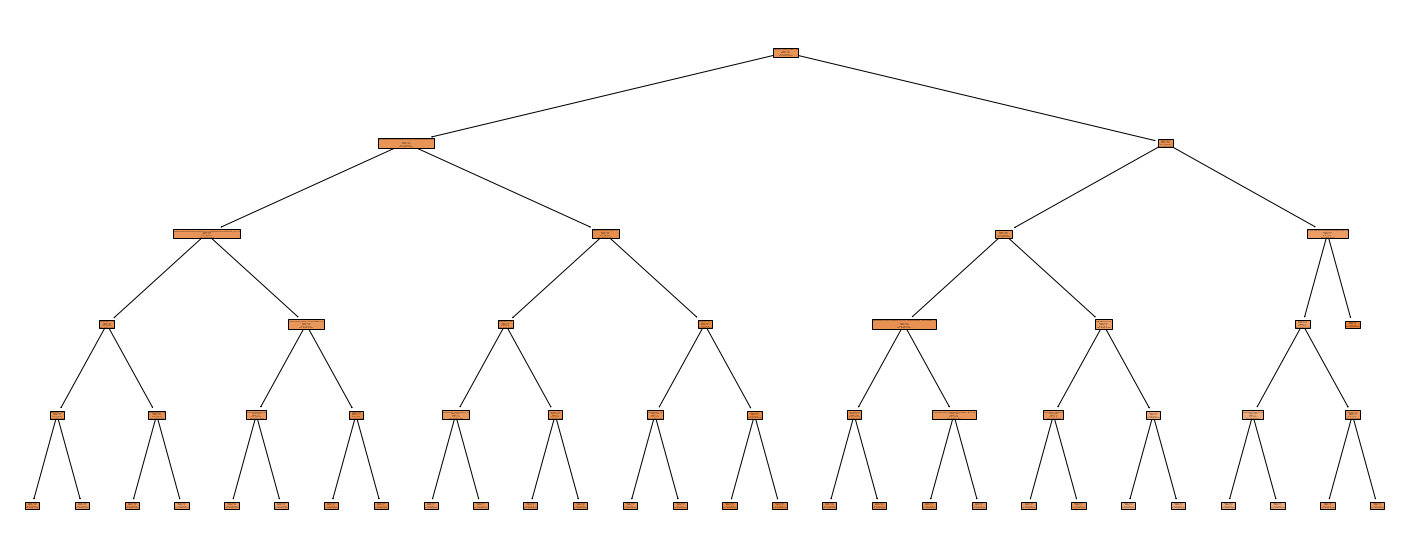

In [152]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))
tree.plot_tree(t, 
               feature_names=d_att.columns, 
               class_names=['No vota por UNEs', 'No vota por UNEs'],
               filled=True)
plt.savefig('Data/tree.png', dpi=400)

# plt.savefig('Data/tree.pdf', format='pdf', bbox_inches = "tight", dpi=400)

In [160]:
import graphviz

# DOT data
dot_data = tree.export_graphviz(t, 
                                out_file=None, 
                                feature_names=d_att.columns,  # nombre de las variables
                                class_names=['Vota por UNES', 'No vota por Unes'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


# Source https://mljar.com/blog/visualize-decision-tree/

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [157]:
text_representation = tree.export_text(t)
print(text_representation)


|--- feature_18 <= 0.50
|   |--- feature_68 <= 0.50
|   |   |--- feature_112 <= 0.50
|   |   |   |--- feature_2 <= 116.00
|   |   |   |   |--- feature_2 <= 68.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  68.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  116.00
|   |   |   |   |--- feature_1 <= 54.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  54.00
|   |   |   |   |   |--- class: 0
|   |   |--- feature_112 >  0.50
|   |   |   |--- feature_86 <= 0.50
|   |   |   |   |--- feature_42 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_42 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_86 >  0.50
|   |   |   |   |--- feature_5 <= 1.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  1.00
|   |   |   |   |   |--- class: 0
|   |--- feature_68 >  0.50
|   |   |--- feature_47 <= 0.50
|   |   |   |--- feature_2 <= 60.00
|   |   |   |   |--- feature_36 <= 0.50
|   |   | 

In [86]:
from sklearn.model_selection import cross_val_score

# Mostrar el promedio del puntaje +/- 2 desviaciones (95% de confianza)

scores =  cross_val_score(t, d_att, d_pass, cv=5)
print('La precisión del modelo es: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

La precisión del modelo es: 0.80 (+/- 0.12)


Realización de validación cruzada en todo el conjunto de datos que dividirá los datos en una base de 20/80, donde el 20% es el conjunto de prueba y el 80% está en el conjunto de entrenamiento. El resultado medio es del 67%. Esto muestra que tenemos un conjunto de datos bien equilibrado. Aquí tenemos varias opciones para hacer con respecto a max_dephth: 

In [57]:
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores =  cross_val_score(t, d_att, d_pass, cv=5)
    print('Máxima profundidad: %d, Precisión: %0.2f (+/- %0.2f)' % (max_depth, scores.mean(), scores.std()*2))

Máxima profundidad: 1, Precisión: 0.88 (+/- 0.00)
Máxima profundidad: 2, Precisión: 0.88 (+/- 0.01)
Máxima profundidad: 3, Precisión: 0.87 (+/- 0.02)
Máxima profundidad: 4, Precisión: 0.87 (+/- 0.03)
Máxima profundidad: 5, Precisión: 0.86 (+/- 0.04)
Máxima profundidad: 6, Precisión: 0.85 (+/- 0.06)
Máxima profundidad: 7, Precisión: 0.84 (+/- 0.06)
Máxima profundidad: 8, Precisión: 0.83 (+/- 0.07)
Máxima profundidad: 9, Precisión: 0.82 (+/- 0.09)
Máxima profundidad: 10, Precisión: 0.82 (+/- 0.09)
Máxima profundidad: 11, Precisión: 0.82 (+/- 0.10)
Máxima profundidad: 12, Precisión: 0.82 (+/- 0.10)
Máxima profundidad: 13, Precisión: 0.80 (+/- 0.10)
Máxima profundidad: 14, Precisión: 0.80 (+/- 0.12)
Máxima profundidad: 15, Precisión: 0.80 (+/- 0.12)
Máxima profundidad: 16, Precisión: 0.79 (+/- 0.12)
Máxima profundidad: 17, Precisión: 0.80 (+/- 0.12)
Máxima profundidad: 18, Precisión: 0.79 (+/- 0.12)
Máxima profundidad: 19, Precisión: 0.79 (+/- 0.12)


In [61]:
depth_acc = np.empty((19, 3), float)
i = 0
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores =  cross_val_score(t, d_att, d_pass, cv=5)
    depth_acc[i, 0] = max_depth
    depth_acc[i, 1] = scores.mean()
    depth_acc[i, 2] = scores.std()*2
    i += 1
    
depth_acc

array([[1.00000000e+00, 8.83693464e-01, 5.49522968e-05],
       [2.00000000e+00, 8.80151551e-01, 1.41540125e-02],
       [3.00000000e+00, 8.72359343e-01, 1.98005451e-02],
       [4.00000000e+00, 8.65629709e-01, 2.60709232e-02],
       [5.00000000e+00, 8.56420737e-01, 3.96386956e-02],
       [6.00000000e+00, 8.46031126e-01, 5.74328001e-02],
       [7.00000000e+00, 8.33280241e-01, 6.29520905e-02],
       [8.00000000e+00, 8.31273157e-01, 6.58836902e-02],
       [9.00000000e+00, 8.23126758e-01, 8.49391931e-02],
       [1.00000000e+01, 8.22064184e-01, 8.57973691e-02],
       [1.10000000e+01, 8.18522271e-01, 9.77914576e-02],
       [1.20000000e+01, 8.14271976e-01, 1.03365936e-01],
       [1.30000000e+01, 8.04944940e-01, 1.01075490e-01],
       [1.40000000e+01, 7.99632071e-01, 1.10183369e-01],
       [1.50000000e+01, 7.94083074e-01, 1.19294043e-01],
       [1.60000000e+01, 7.93492755e-01, 1.23487295e-01],
       [1.70000000e+01, 7.94083074e-01, 1.12330057e-01],
       [1.80000000e+01, 7.93492

Usamos varios valores max_dephth de 1 a 20, considerando que hacemos un árbol con una pregunta o con 20 preguntas que tienen un valor de profundidad de 20, lo que nos dará preguntas de más de 20, lo que significa que tendrá que bajar 20 pasos para llegar a un nodo de hoja. . Aquí volvemos a realizar una validación cruzada y guardamos e imprimimos nuestra respuesta. Esto le dará una precisión y cálculos diferentes. Al analizarlo, se encontró que con una profundidad de 2 y 3, la precisión es la mejor, lo que se comparó con la precisión promedio que encontramos anteriormente. La siguiente captura de pantalla muestra los datos que usaremos para crear el gráfico:
Realización de validación cruzada en todo el conjunto de datos que dividirá los datos en una base de 20/80, donde el 20% es el conjunto de prueba y el 80% está en el conjunto de entrenamiento. El resultado medio es del 67%. Esto muestra que tenemos un conjunto de datos bien equilibrado. Aquí tenemos varias opciones para hacer con respecto a max_dephth:

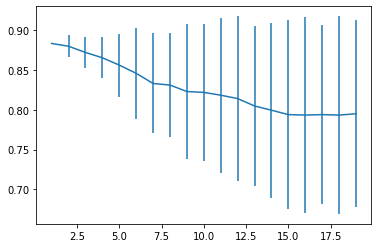

In [62]:
import matplotlib.pyplot as plt
fi, ax = plt.subplots()
ax.errorbar(depth_acc[ :, 0], depth_acc[ :, 1], yerr=depth_acc[ :, 2])
plt.show()